**Nombre:** Luis Felipe Acosta Zavaleta

**Código:** 20143350

In [56]:
#Librerías 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from causalgraphicalmodels import CausalGraphicalModel
import matplotlib.pyplot as plt
import sympy as sy
import math
import sklearn
from sympy import *
import scipy as sp
import networkx
import ipywidgets as widgets
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.iolib.summary2 import summary_col

# Teoría

## 1. (2 puntos) Defina el Multiplicador Keynesiano y dé un ejemplo de cómo influye este en el modelo Ingreso-Gasto Keynesiano.

El multiplicador keynesiano se refiere a que un cambio en la magnitud de cualquiera de los componentes autónomos de $DA$ ($C$, $I$, $G$, $T$, $X$ y $M$, que conforman el intercepto) **genera un proceso multiplicador** de $Y$ hasta converger al nuevo $Y$ y producto de equilibrio. Por tanto, el aumento multiplicado del ingreso es **resultado de los efectos directos e indirectos ocasionados por el aumento de cualquiera de los componentes autónomos de la $DA$**. Por tanto, lo más importante de la ecuación de $DA$ es el multiplicador keynesiano. 

El tamaño del multiplicador depende de la magnitud de los parámetros $b$ (propensión marginal a consumir), $m$ (proporción de salida de dinero) y $t$ (tasa impositiva), pues "filtran la demanda".

$$k = \frac{1}{1 - (b - m)(1 - t)}$$

Es necesario advertir que este modelo supone una economía cerrada y sin gobierno con dos sectores de producción: uno de bienes de Inversión y otro de bienes de Consumo. 

Teniendo en cuenta ello, podemos afirmar que cuando existe un incremento en la inversión total, $Y$ aumentará en una cantidad que es $k$ veces el incremento de la inversión. 

$k$ es resultado de un proceso que: 

- Empieza con el aumento de la demanda de Inversión. Esto produce un aumento de la producción e ingreso en el sector que produce los bienes de Inversión. 
- A su vez, este incremento del ingreso genera un aumento de la demanda de Consumo y de la producción e ingreso en el sector que produce bienes de Consumo. 
- El segundo incremento del ingreso aumenta la demanda de bienes de Consumo y por tanto también la producción e ingreso del sector dedicado a los bienes de Consumo. 

Ahora bien, podemos observar cómo influye $k$ en el modelo Ingreso-Gasto cuando aumenta $G$. Si el gobierno decide aumentar $G$, este aumento genera que se eleve la magnitud del intercepto de la función de la $DA$, por lo cual se desplaza hacia arriba. Esto es debido a que la tasa de interés real, el consumo, la inversión y las exportaciones autónomas no cambian; ni tampoco la presión tributaria y las propensiones marginales a consumir e importar. Toda vez que el $G$ y el multiplicador son mayores a 0, el incremento total del ingreso es igual al multiplicador por el incremento del gasto. 

## 2. (2 puntos) Grafique y explique cúando sucede un exceso y déficit de demanda en el modelo Ingreso-Gasto. Señale las áreas donde ocurre cada caso. Explique cómo se converge al equilibrio a partir de estos dos escenarios.

En ausencia de equilibrio, la $DA$ puede ser mayor o igual que el ingreso o producto. Estas ecuaciones de desequilibrio desaparecen, pues el modelo es estable y tiene convergencia al equilibrio. 

Los aumentos de $DA$ dan lugar a excesos de demanda y provocan la caída de los inventarios o exitencias de las empresas. Por tanto, las empresas deciden deciden aumentar su producción en un monto similar al aumento de la demanda. Podemos sostener que los excesos de demanda se enfrentan con los aumentos de producción. 

Por el contrario, cuando ocurre un déficit de demanda o exceso de producción, aumentan los inventarios de bienes y las empresas deciden reducir su producción y despiden trabajadores. Por ende, la oferta de producción se ajusta a los cambios en la $DA$.

En el siguiente gráfico, $E$ es el punto de equilibrio, $A$ exceso de demanda y $B$ exceso de producción o déficit de demanda. 

In [60]:
#IS

Y_size = 100 

Co = 35
Io = 40
Go = 40
Xo = 2
h = 0.7
b = 0.8
m = 0.2
t = 0.3
r = 0.9

Y = np.arange(Y_size)

def DA_K(Co, Io, Go, Xo, h, r, b, m, t, Y):
    DA_K = (Co + Io + Go + Xo - h*r) + ((b - m)*(1 - t)*Y)
    return DA_K

DA_IS_K = DA_K(Co, Io, Go, Xo, h, r, b, m, t, Y)

#Curva de 45°

a = 2.5 

def L_45(a, Y):
    L_45 = a*Y
    return L_45

L_45 = L_45(a, Y)

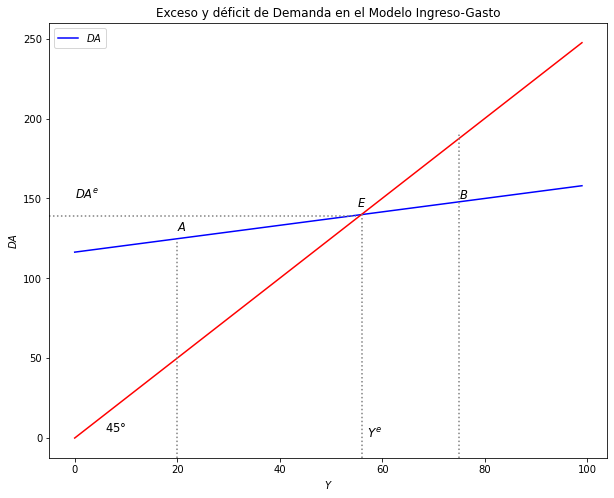

In [66]:
# Gráfico

y_max = np.max(DA_IS_K)
fig, ax = plt.subplots(figsize=(10, 8))

ax.plot(Y, DA_IS_K, label = "$DA$", color = "blue") 
ax.plot(Y, L_45, color = "red") 

plt.axvline(x = 75, ymin= 0, ymax = 0.75, linestyle = ":", color = "grey")
plt.axvline(x = 56,  ymin= 0, ymax = 0.56, linestyle = ":", color = "grey")
plt.axvline(x = 20,  ymin= 0, ymax = 0.50, linestyle = ":", color = "grey")
plt.axhline(y = 139, xmin= 0, xmax = 0.55, linestyle = ":", color = "grey")

plt.text(0, 150, '$DA^e$', fontsize = 11.5, color = 'black')
plt.text(55, 145, '$E$', fontsize = 11.5, color = 'black')
plt.text(75, 150, '$B$', fontsize = 11.5, color = 'black')
plt.text(20, 130, '$A$', fontsize = 11.5, color = 'black')
plt.text(6, 4, '$45°$', fontsize = 11.5, color = 'black')
plt.text(57, 0, '$Y^e$', fontsize = 12, color = 'black')

ax.set(title = "Exceso y déficit de Demanda en el Modelo Ingreso-Gasto", xlabel = '$Y$', ylabel = '$DA$')
ax.legend()

plt.show()

## 3. (2 puntos) ¿Cuáles son las herramientas de política fiscal y política monetaria? De un ejemplo para cada una de ellas dentro del contexto peruano. Coloque su fuente en caso sea necesario. (Solo necesita 1 para pol. Fiscal y 1 para Monetaria).

### Política fiscal

Los instrumentos de política fiscal usados por el gobierno para estabilizar las fluctuaciones del producto son dos: 
- La tasa de tributación ($t$): $T$ es lo que el gobierno recauda en impuestos y de esta depende la disponibilidad de dinero que tienen los agentes económicos. Depende de $t$. En ese sentido, la referida disponibilidad depende de la disminución o aumento $t$.
- El gasto autónomo ($G_0$): incluye las compras del Estado (remuneraciones de funcionarios y pago por la compra de bienes y servicios).

Recientemente, el Ejecutivo remitió al Congreso un PL para que se extienda la vigencia de leyes para la devolución del IGV e Impuesto de Promoción Municipal a los titulares de la actividad minera durate la fase de exploración y la exploración en actividades mineras e hidrocarburos. En ese sentido, el PL busca reducir $t$ (política fiscal expansiva) a fin de incentivar la actividad minera e hidrocarburífera.

https://wb2server.congreso.gob.pe/spley-portal/#/expediente/2021/3195

### Política monetaria

Existen tres instrumentos de política monetaria: la *Operación de Mercado Abierto*, el *coeficiente legal de encaje* y la *tasa de interés*.

El primer instrumento, la *Operación de Mercado Abierto*, se refiere a la compra o venta activos financieros o bonos por parte del Banco Central a los bancos comerciales. 

El segundo instrumento con el que cuenta el Banco Central es el *coeficiente legal de encaje*. El Banco central puede aumentar o disminuir la cantidad de dinero que tienen los bancos para realizar préstamos mediante el aumento o disminución de la tasa de encaje, pues ello implica que los bancos comerciales deben tener menos o más dinero en forma de reservas en el balance del Banco Central. 

Finalmente, la *tasa de interés* (de referencia de la política monetaria) es un instrumento usado por los Bancos Centrales desde 1990 gracias al cual la oferta monetaria pasó a ser una variable endógena. 

Un ejemplo política monetaria es el reciente aumento de la tasa de interés de referencia por parte del BCRP a 7% (política monetaria contractiva) que tiene como fin frentar la tendencia inflacionaria local debido a la difícil coyuntura internacional.

https://www.bcrp.gob.pe/docs/Transparencia/Notas-Informativas/2022/nota-informativa-2022-10-06-1.pdf 

## 4. (2) Explique qué funciones del dinero respaldan el éxito de de Yape y Plin (aplicativos moviles para intercambio de dinero).

Yape y Plin son aplicaciones que permiten la transferencia inmediata de moneda nacional (nuevos soles). Es decir, el activo financiero sigue siendo el mismo. Las funciones del dinero son unidad de cuenta y patrón de precios, medio de intercambio, medio de pago y reserva de valor. En ese sentido, podemos señalar que, gracias a los aplicativos en cuestión, el nuevo sol únicamente pasó del formato físico al digital. El éxito de los aplicativos relacionados a las funciones del dinero están en cuanto a que el dinero es un medio de intercambio (facilita el intercambio de bienes y dinero) y medio de pago (para cancelar deudas o servicios). Al permitir transacciones más fáciles y fluidas (sin comisiones ni exigencias de montos mínimos), el rol del dinero como medio de intercambio y medio de pago se ve facilitado en gran medida haciendo uso de las mencionadas aplicaciones. Por último, las funciones de unidad de cuenta y patrón de precios y reserva de valor no explican el éxito de Yape y Plin.


## 5. (3 puntos) Cuáles son las conclusiones principales del paper de Dancurt "Inflation Targeting in Peru: The Reasons for the Success"

Una primera conclusión es que la política macroeconómica implementada por el BCRP fue exitosa para lograr la estabilidad macroeconómica del Perú durante contextos externos favorables y desfavorables. Esto, debido a dos decisiones principales que la entidad tomó entre los años 2002 y 2013: 1. implementar un sistema de metas con una tasa de interés de referencia, como principal instrumento de política monetaria; y 2. mantener reservas suficientes de moneda extranjera.

Sus siguientes conclusiones se refieren a recomendaciones de políticas públicas en materia monetaria. En ese sentido:

- Una segunda conclusión es que frente a un contexto económico favorable el BCRP debe subir las tasas de interés y comprar moneda extranjera; mientras que frente a un contexto desfavorable la institución debe bajar las tasas de interés y vender moneda extranjera. 

- Una tercera conclusión para evitar crisis bancarias, el BCRP debe limitar los préstamos de moneda extranjera que toman los bancos comerciales, imponiendo mayores requerimientos de reserva legal para ello. Esto tiene como fin de desdolarizar la deuda de las entidades bancarias y, en consecuencia, la economía. 

Una cuarta conclusión es que la caída sistemática del tipo de cambio real calculada a partir de 2007 está vinculada a un error de política del BCRP: reducir la meta de inflación en 2007. Como recomendación de política pública al respecto, afirma que una regla de intervención cambiaria simétrica permite evitar caídas del tipo de cambio real y, a la vez, permite cumplir la meta de inflación, como se demostró en el período que va del 2002 al 2006.

Una quinta conclusión, referida a investigaciones a futuro, es la necesidad de determinar si la política monetaria del BCRP sería efectiva en el marco de una coyuntura internacional desfavorable de mayor duración y si es posible que la tasa de interés de referencia deje de ser el principal instrumento de política monetaria del BCRP. 

La última conclusión, otra vez una recomendación de política pública monetaria, es que, a través de una regla de Taylor (para gestionar la tasa de interés con una regla de intervención en el tipo de cambio), dirigida al equilibrio interno; junto con una regla de intervención del tipo de cambio que va contra el viento, dirigida al equilibrio externo, es posible estabilizar los niveles de precios y la actividad económica sin liquidar la diversificación productiva a largo plazo. Esto es relevante por la baja diversificación productiva que tiene el país.

# Ejercicio 1

## 1. (2 puntos) Encuentre el Ingreso de Equilibrio  e identifique el multiplicador keynesiano.

La ecuación de la $DA$ es: 

$$ DA = C + I + G + X - M$$

Teniendo en cuenta que:

$$C = C_0 + bY^d$$

$$I = I_0-hr$$

$$G = G_0$$

$$X= x_1Y^*+x_2\epsilon$$

$$M= m_1Y^d-m_2\epsilon$$

$$T = tY$$

$$Y^d = Y - T$$

$$DA = C + I + G + (X - M)$$

$$Y = DA$$

Y que: 

$$\epsilon=\epsilon_0-p(r-r^*)$$

Tenemos que:

$$Y = C_0 + bY^d + I_0 - hr + G_0 + x_1Y^* + x_2\epsilon-m_1Y^d + m_2\epsilon$$

$$Y - (b - m_1)Y^d = C_0 + I_0 + G_0 + x_1Y^* + (x_2 + m_2)\epsilon-hr$$

$$Y -(b-m_1)(1-t)Y = C_0 + I_0 + G_0  + x_1Y^* + (x_2 + m_2)(\epsilon_0-pr+pr^*)-hr$$

$$Y[1 - (b - m_1)(1 - t)] = C_0 + I_0 + G_0 + x_1Y^* + (x_2 + m_2)(\epsilon_0 + pr^*) - [(x_2 + m_2)p + h]r$$

$$Y = \frac{1}{1 -(b - m_1)(1 - t)} [C_0 + I_0 + G_0 + x_1Y^* + (x_2 + m_2)(\epsilon_0 + pr^*)] - \frac{1}{1 - (b - m_1)(1 - t)}[(x_2 + m_2)p + h]r$$

Donde el multiplicador es: 

$$\frac{1}{1 - (b - m_1)(1 - t)}$$

## 2. (2 puntos) Analice los efectos sobre la variable endógena  de una disminución del gasto fiscal . El análisis debe ser intuitivo, matemático y gráfico.

### Intuición


## 3. (2 puntos) Analice los efectos sobre la variable endógena  de un incremento del PBI mundial . El análisis debe ser intuitivo, matemático y gráfico.

# Ejercicio 2

## 1. (2 puntos) Encuentre las ecuaciones de equilibrio de , 

### DA

$$IS: [1-b(1-t)]Y= C_o + I_o + G_o -hr_0$$

$$IS: \beta_1Y=\beta_0-hr_0$$

$$ IS: r_0= \frac{\beta_0}{h}-\frac{\beta_1}{h}Y$$

Donde:

$$\beta_0 = C_o + I_o + G_oy \beta_1 = 1 - (b)(1 - t)$$

$$LM: M_0^s - P = kY - jr_0$$

Se reemplaza ($r$) y se obtiene la ecuación de la $DA$. Ahora, la ecuación es una recta y no una hipérbola:

$$ M_0^s - P = kY - j\frac{\beta_0}{h} + j\frac{\beta_1}{h}Y$$

$$ P = M_0^s + j\frac{\beta_0}{h} - j\frac{\beta_1}{h}Y - kY$$

$$P = \frac{hM_0^s + j\beta_0}{h} - \frac{j\beta_1 + hk}{h}Y$$

### OA

$$P = P^e + θ(Y - \bar{Y})$$

Hay tres variables endógenas en $DA-OA$:

$$Y^{eq}, r^{eq} ,P^{eq}$$

Considerando que la ecuación de $(DA)$ es:

$$P = \frac{hM_0^s + j\beta_0}{h} - \frac{j\beta_1 + hk}{h}Y (1)$$

Y la ecuación de la $(OA)$:

$$P=P^e+\theta(Y-Y ̅ ) (2)$$

Igualamos (1) y (2) para encontrar $ Y^{eq\_da\_oa}$:

$$\frac{h Mo^s + jB_o}{h} - \frac{jB_1 + hk}{h}Y = P^e + θ(Y - \bar{Y})$$

$$Y^{eq\_da\_oa} = [ \frac{1}{(θ + \frac{jB_1 + hk}{h})} ]*[(\frac{h Mo^s + jB_o}{h} - P^e + θ\bar{Y})]$$

Para encontrar $P^{eq}$, reemplazamos $Y^{eq}$ en la ecuación de $OA$:

$$P^{eq\_da\_oa} = P^e + θ( Y^{eq\_da\_oa} - \bar{Y})$$

$$P^{eq\_da\_oa} = P^e + θ( [ \frac{1}{(θ + \frac{jB_1 + hk}{h})} ]*[(\frac{h Mo^s + jB_o}{h} - P^e + θ\bar{Y})] - \bar{Y})$$

## 2. (3 puntos) Analice los efectos sobre las variables endógenas Y, P ante una subida de la tasa de interés de referencia . . El análisis debe ser intuitivo, matemático y gráfico.